Name : Sneha Maria George 

 # PREDICTION USING SUPERVISED ML

## AIM:

To Predict the percentage of an student based on the number of study hours.

To Find What will be predicted score if a student studies for 9.25 hrs/ day

## ANALYSIS:

In [2]:
#LOADING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Reading data from  link
df= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(10)   #DISPLAYS THE FIRST 10 ROWS OF DATASET

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#UNDERSTANDING THE DATA:
#BASIC EDA:
df.shape

(25, 2)

From the above it can be infered that there are 25 Rows and 2 Columns.

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

From the above ,we can infer that it is a Clean Dataset.Hence Data cleaning isn't required.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013ADA221CC0>,
      dtype=object)

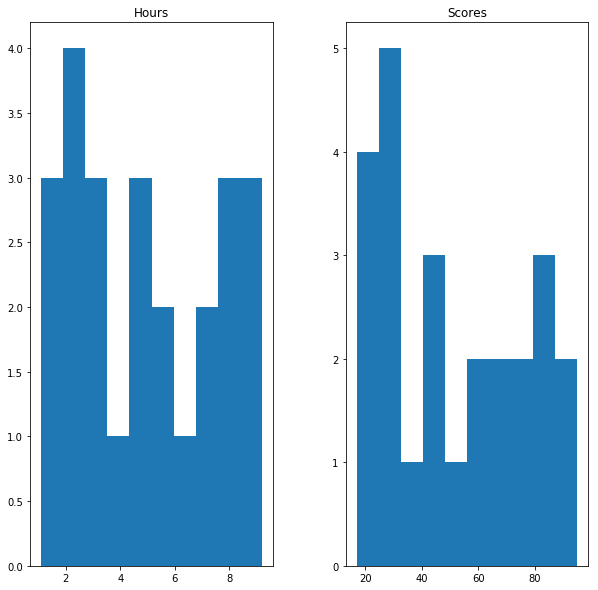

In [6]:
#Checking distributions:
df.hist(figsize=(10,10), grid=0)

we dont find a particular distribution from the above graph.

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#About the Data:
print('-----------------------------------------------------------------------')
print("\n DATASET DESCRIPTION :\n ")   #INFORMATION ABOUT DATA
df.info()
print('-----------------------------------------------------------------------')
print("\n DATASET TYPE:\n ",type(df))   #THE TYPE OF DATASET I.E SERIES,DATAFRAME
print('-----------------------------------------------------------------------')
print("\n DESCRIPTION OF INDEX:",df.index)    #RETURNS INDEXES
print('-----------------------------------------------------------------------')
print("\n DESSCRIPTION OF COLUMN :\n ",df.columns)   #COLUMN NAMES
print('-----------------------------------------------------------------------')
print("\n THE NUMBER OF NON-NA VALUES IN DATASET:\n",df.count())   #NON-NA ,NON-MISSING VALUES

-----------------------------------------------------------------------

 DATASET DESCRIPTION :
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes
-----------------------------------------------------------------------

 DATASET TYPE:
  <class 'pandas.core.frame.DataFrame'>
-----------------------------------------------------------------------

 DESCRIPTION OF INDEX: RangeIndex(start=0, stop=25, step=1)
-----------------------------------------------------------------------

 DESSCRIPTION OF COLUMN :
  Index(['Hours', 'Scores'], dtype='object')
-----------------------------------------------------------------------

 THE NUMBER OF NON-NA VALUES IN DATASET:
 Hours     25
Scores    25
dtype: int64


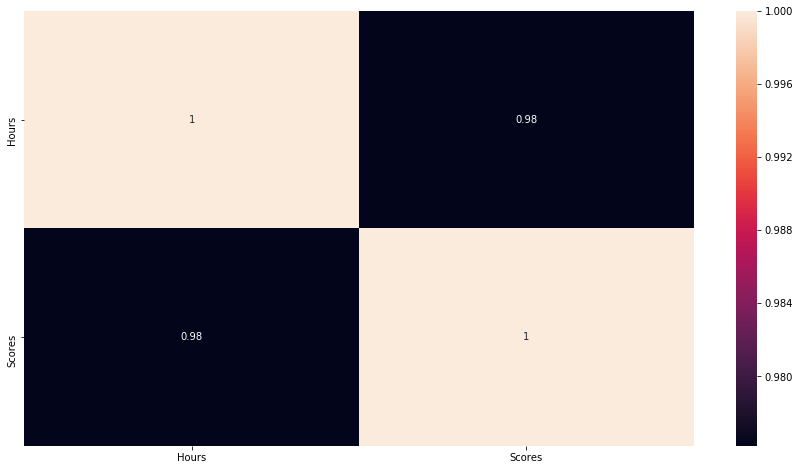

In [9]:
#CHCEKING CORRELATION BETWEEN HOURS AND SCORES USING HEATMAP OF SEABORN LIBRARY:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the Above Heatmap ,it is evident that there is a strong positive correlation between Hours of studing ,and the marks scored.

Now let's plot a Scatter plot between the two variables ,to check if there is linear Relationship between them.

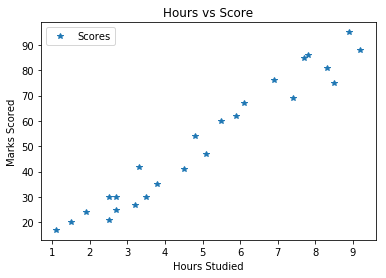

In [25]:
df.plot(x='Hours', y='Scores',style="*")  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.legend()
plt.show()

From,the above graph from the matplot ,we can infer that there is linear relationship between two variables,suggesting we can proceed with Simple Linear Regression Model.

### Modelling:

In [17]:
x=df["Hours"]
y=df["Scores"]
slope, intercept, r, p, std_err = stats.linregress(x, y)
print("regression coefficient",r)
res = stats.linregress(x, y)
print("Regression result: \n", res)

regression coefficient 0.9761906560220887
Regression result: 
 LinregressResult(slope=9.775803390787473, intercept=2.4836734053731817, rvalue=0.9761906560220887, pvalue=9.132624467459331e-17, stderr=0.45294141201804755)


So,the Model Obtained is 

##### STUDY=2.4836734053731817 + 9.775803390787473 * Hours Of Study 

We,can also observe that the R value is 0.9761906560220887 ,this infers that the above model is 97% adequete 

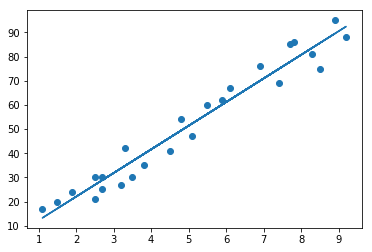

In [22]:
#Implymenting it WRT to a Function
def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))  
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

From the above graph,It can be observed that by fitting a abline(Fitted Line) an increasing Trend can be observed ,implying that as the Number of Studing Hours increases
the Score gradually Increasing,Interpretina a strong Assosiation Between the above two Variables.

### Predicting For Particular Hour:

In [18]:
####Predicting the unknown test sample
mymodel_Predicted = list(map(myfunc, [9.25]))
print("Predicted value", mymodel_Predicted)

Predicted value [92.90985477015731]


From the Above model we get a Value of 92.90985 ,Implying that if a student studies for 9 Hours 25 Minutes ,He/She would almost surely score of 92.90 %. 